https://github.com/bhattbhavesh91/svm-c-gamma-hyperparameters-tutorial/blob/main/svm-c-gamma-hyperparameters-notebook.ipynb

In [4]:
import numpy as np
import pandas as pd
from sklearn import datasets


from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [5]:
# BaggingClassifier(model,n_estimators=10,max_samples=0.50,max_features=1.0)
# AdaBoostClassifier(model,n_estimators = 10,learning_rate=0.01)

In [6]:
iris = datasets.load_iris()
X,y = iris.data[:,1:3],iris.target

In [7]:
clf1 = LogisticRegression(random_state = 42)
clf2 = RandomForestClassifier(random_state=42)
clf3 = GaussianNB()

# Cross-Validation

In [8]:
classifiers = ['Logistic Regression','Random forest Classifier','GaussianNB']

for clf,cnames in  zip([clf1,clf2,clf3],classifiers):
    scores = cross_val_score(clf,X,y,cv=5,scoring='accuracy')
    print("Accuracy is  %0.2f ( +/- %0.2f) [%s]"%(scores.mean(),scores.std(),cnames))
    

Accuracy is  0.95 ( +/- 0.04) [Logistic Regression]
Accuracy is  0.94 ( +/- 0.04) [Random forest Classifier]
Accuracy is  0.91 ( +/- 0.04) [GaussianNB]


# Voting Classifier

In [9]:
voting_hard = VotingClassifier([(classifiers[0],clf1),
                               (classifiers[1],clf2),
                               (classifiers[2],clf3)],voting='hard')

In [10]:
voting_soft = VotingClassifier([(classifiers[0],clf1),
                               (classifiers[1],clf2),
                               (classifiers[2],clf3)],
                              voting='soft')

In [11]:
classifiers_upd =  ['Logistic Regression','Random forest Classifier','GaussianNB',
                   'Voting Classifier hard','Voting Classifier Soft']

for clf,cnames in zip([clf1,clf2,clf3,voting_hard,voting_soft],classifiers_upd):
    scores = cross_val_score(clf,X,y,cv=5,scoring='accuracy')
    print("Accuracy : %0.2f (+ /- %0.2f) [%s]"%(scores.mean(),scores.std(),cnames))

Accuracy : 0.95 (+ /- 0.04) [Logistic Regression]
Accuracy : 0.94 (+ /- 0.04) [Random forest Classifier]
Accuracy : 0.91 (+ /- 0.04) [GaussianNB]
Accuracy : 0.95 (+ /- 0.03) [Voting Classifier hard]
Accuracy : 0.95 (+ /- 0.03) [Voting Classifier Soft]


# Diabetes Dataset

In [12]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
X = df.drop("Outcome",axis=1)
y = df['Outcome']

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.20,stratify=y)

In [15]:
dt = tree.DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [16]:
dt.score(xtest,ytest)

0.7597402597402597

In [17]:
dt.score(xtrain,ytrain)

1.0

In [68]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

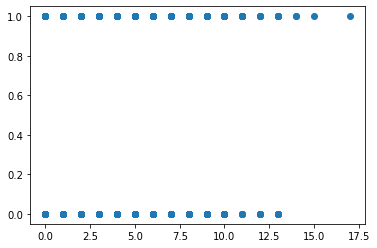

In [73]:
plt.scatter(X['Pregnancies'],y)

#  RandomForestClassifier

In [18]:
rf = RandomForestClassifier(n_estimators=6)
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=6)

In [19]:
rf.score(xtest,ytest)

0.7272727272727273

In [20]:
rf.score(xtrain,ytrain)

0.9771986970684039

# Bagging Classifier

In [21]:
bg = BaggingClassifier(tree.DecisionTreeClassifier(),n_estimators=20,
                       max_features=1.0)
bg.fit(xtrain,ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20)

In [22]:
bg.score(xtest,ytest)

0.7402597402597403

In [23]:
bg.score(xtrain,ytrain)

0.99185667752443

# Boosting

In [24]:
adb = AdaBoostClassifier(tree.DecisionTreeClassifier(),n_estimators=20,learning_rate=0.001)
adb.fit(xtrain,ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.001,
                   n_estimators=20)

In [25]:
adb.score(xtest,ytest)

0.7662337662337663

In [26]:
adb.score(xtrain,ytrain)

1.0

In [27]:
voting_hard = VotingClassifier([(classifiers[0],clf1),
                               (classifiers[1],clf2),
                               (classifiers[2],clf3)],voting='hard')

In [28]:
voting_hard.fit(xtrain,ytrain)

C:\Users\SURUTHI S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(random_state=42)),
                             ('Random forest Classifier',
                              RandomForestClassifier(random_state=42)),
                             ('GaussianNB', GaussianNB())])

In [29]:
voting_hard.score(xtest,ytest)

0.7597402597402597

In [30]:
voting_hard.score(xtrain,ytrain)

0.8159609120521173

In [31]:
gb = GradientBoostingClassifier(n_estimators=100,max_depth=4,subsample=0.5)

In [32]:
gb.fit(xtrain,ytrain)
print(gb.score(xtest,ytest))
gb.score(xtrain,ytrain)

0.7597402597402597


0.9755700325732899

# HyperParameter Tuning

In [33]:
params = {
    'n_estimators' : [50,100,150],
    'max_depth' : [3,4,5],
    'subsample':[0.5,0.6]
}

In [34]:
gs = GridSearchCV(gb,param_grid=params)

In [35]:
gs.fit(xtrain,ytrain)

GridSearchCV(estimator=GradientBoostingClassifier(max_depth=4, subsample=0.5),
             param_grid={'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 150],
                         'subsample': [0.5, 0.6]})

In [36]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.111119,0.002745,0.000000,0.000000,3,50,0.5,"{'max_depth': 3, 'n_estimators': 50, 'subsampl...",0.747967,0.813008,0.731707,0.788618,0.704918,0.757244,0.038911,2
1,0.115773,0.005349,0.005351,0.006571,3,50,0.6,"{'max_depth': 3, 'n_estimators': 50, 'subsampl...",0.715447,0.804878,0.707317,0.788618,0.713115,0.745875,0.041938,7
2,0.213493,0.010027,0.006300,0.007716,3,100,0.5,"{'max_depth': 3, 'n_estimators': 100, 'subsamp...",0.747967,0.772358,0.731707,0.739837,0.729508,0.744276,0.015479,9
3,0.220208,0.008378,0.006251,0.007656,3,100,0.6,"{'max_depth': 3, 'n_estimators': 100, 'subsamp...",0.764228,0.747967,0.731707,0.772358,0.737705,0.750793,0.015421,4
4,0.313592,0.006870,0.004805,0.006314,3,150,0.5,"{'max_depth': 3, 'n_estimators': 150, 'subsamp...",0.747967,0.772358,0.731707,0.723577,0.737705,0.742663,0.016845,12
5,0.364559,0.029933,0.004333,0.003564,3,150,0.6,"{'max_depth': 3, 'n_estimators': 150, 'subsamp...",0.780488,0.788618,0.715447,0.731707,0.704918,0.744236,0.034105,11
6,0.143833,0.009299,0.001601,0.003201,4,50,0.5,"{'max_depth': 4, 'n_estimators': 50, 'subsampl...",0.747967,0.764228,0.715447,0.756098,0.696721,0.736092,0.025726,16
7,0.149695,0.005754,0.001130,0.001604,4,50,0.6,"{'max_depth': 4, 'n_estimators': 50, 'subsampl...",0.764228,0.764228,0.707317,0.756098,0.737705,0.745915,0.021594,6
8,0.266955,0.001970,0.006250,0.007655,4,100,0.5,"{'max_depth': 4, 'n_estimators': 100, 'subsamp...",0.813008,0.772358,0.715447,0.756098,0.737705,0.758923,0.033027,1
9,0.282799,0.005459,0.008070,0.007236,4,100,0.6,"{'max_depth': 4, 'n_estimators': 100, 'subsamp...",0.739837,0.747967,0.731707,0.764228,0.713115,0.739371,0.016971,14


In [37]:
gs.best_params_

{'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5}

In [38]:
gb = GradientBoostingClassifier(**gs.best_params_)

In [39]:
gb.fit(xtrain,ytrain)
print(gb.score(xtest,ytest))
gb.score(xtrain,ytrain)

0.7402597402597403


0.9739413680781759

In [40]:
gs = RandomizedSearchCV(gb,param_distributions=params)

In [41]:
gs.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=GradientBoostingClassifier(max_depth=4,
                                                        subsample=0.5),
                   param_distributions={'max_depth': [3, 4, 5],
                                        'n_estimators': [50, 100, 150],
                                        'subsample': [0.5, 0.6]})

In [42]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.202163,0.020557,0.001949,0.003154,0.6,50,5,"{'subsample': 0.6, 'n_estimators': 50, 'max_de...",0.707317,0.788618,0.699187,0.772358,0.696721,0.732840,0.039399,9
1,0.463177,0.120472,0.006424,0.005994,0.5,150,5,"{'subsample': 0.5, 'n_estimators': 150, 'max_d...",0.723577,0.788618,0.723577,0.756098,0.729508,0.744276,0.025223,6
2,0.583474,0.050591,0.004334,0.003733,0.6,150,5,"{'subsample': 0.6, 'n_estimators': 150, 'max_d...",0.747967,0.764228,0.756098,0.764228,0.696721,0.745848,0.025293,5
3,0.350310,0.027163,0.005047,0.002763,0.6,150,3,"{'subsample': 0.6, 'n_estimators': 150, 'max_d...",0.788618,0.747967,0.756098,0.747967,0.713115,0.750753,0.024060,2
4,0.499577,0.049113,0.004520,0.004080,0.6,150,4,"{'subsample': 0.6, 'n_estimators': 150, 'max_d...",0.731707,0.764228,0.739837,0.739837,0.713115,0.737745,0.016451,7
5,0.362276,0.054121,0.003649,0.003224,0.5,150,4,"{'subsample': 0.5, 'n_estimators': 150, 'max_d...",0.756098,0.747967,0.723577,0.747967,0.696721,0.734466,0.021798,8
6,0.262836,0.008676,0.002795,0.002921,0.5,100,5,"{'subsample': 0.5, 'n_estimators': 100, 'max_d...",0.739837,0.780488,0.731707,0.731707,0.745902,0.745928,0.018088,4
7,0.371528,0.039333,0.004761,0.002135,0.6,100,5,"{'subsample': 0.6, 'n_estimators': 100, 'max_d...",0.739837,0.780488,0.715447,0.747967,0.754098,0.747568,0.021062,3
8,0.295361,0.006054,0.004823,0.003938,0.6,100,4,"{'subsample': 0.6, 'n_estimators': 100, 'max_d...",0.707317,0.756098,0.715447,0.739837,0.729508,0.729641,0.017342,10
9,0.189492,0.012910,0.001602,0.003204,0.5,50,5,"{'subsample': 0.5, 'n_estimators': 50, 'max_de...",0.756098,0.780488,0.731707,0.764228,0.721311,0.750766,0.021558,1


In [43]:
gs.best_params_

{'subsample': 0.5, 'n_estimators': 50, 'max_depth': 5}

In [44]:
gb = GradientBoostingClassifier(**gs.best_params_)

In [45]:
gb.fit(xtrain,ytrain)
print(gb.score(xtest,ytest))
gb.score(xtrain,ytrain)

0.7467532467532467


0.9739413680781759

In [46]:
from matplotlib.colors import ListedColormap

In [48]:
mapping = ListedColormap(("red",'green'))

In [49]:
def plot_decision_boundary(X, y, clf):
  X_set, y_set = X, y
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  plt.figure(figsize=(10,6))
  plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap_boundary)
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap_pts)(i), label = j)
  plt.title('SVM Decision Boundary')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  return plt.show()

In [ ]:
X_train[:,0]

In [61]:
len(X)

768

In [62]:
len(y)

768

In [66]:
from sklearn.svm import SVC

In [67]:
svc = SVC()
svc.fit(xtrain,ytrain)
print(svc.score(xtest,ytest))
svc.score(xtrain,ytrain)

0.7272727272727273


0.7833876221498371

In [77]:
param = {'kernel':['linear','poly','rbf','sigmoid'],'C':[0.1,1,5,10]}

In [78]:
rs = RandomizedSearchCV(svc,param_distributions=param)
rs.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 5, 10],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [79]:
print(rs.score(xtest,ytest))
rs.score(xtrain,ytrain)

0.7402597402597403


0.7817589576547231

In [80]:
pd.DataFrame(rs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011693,0.003227,0.006993,0.000862,sigmoid,5,"{'kernel': 'sigmoid', 'C': 5}",0.439024,0.398374,0.471545,0.430894,0.491803,0.446328,0.032542,9
1,0.012500,0.006250,0.005280,0.006683,sigmoid,10,"{'kernel': 'sigmoid', 'C': 10}",0.406504,0.398374,0.487805,0.406504,0.500000,0.439837,0.044411,10
2,0.044848,0.014493,0.009377,0.007656,poly,5,"{'kernel': 'poly', 'C': 5}",0.731707,0.821138,0.756098,0.756098,0.721311,0.757270,0.034723,2
3,19.185813,5.507492,0.000908,0.001816,linear,5,"{'kernel': 'linear', 'C': 5}",0.715447,0.821138,0.731707,0.756098,0.754098,0.755698,0.036002,4
4,0.013983,0.003013,0.003141,0.006283,poly,0.1,"{'kernel': 'poly', 'C': 0.1}",0.739837,0.804878,0.731707,0.780488,0.713115,0.754005,0.033643,5
5,0.015644,0.000065,0.012564,0.006285,rbf,0.1,"{'kernel': 'rbf', 'C': 0.1}",0.682927,0.674797,0.699187,0.666667,0.647541,0.674224,0.017137,7
6,0.016030,0.000583,0.009273,0.007591,rbf,5,"{'kernel': 'rbf', 'C': 5}",0.707317,0.804878,0.764228,0.764228,0.696721,0.747474,0.040112,6
7,0.025061,0.007735,0.003124,0.006249,poly,1,"{'kernel': 'poly', 'C': 1}",0.747967,0.821138,0.731707,0.772358,0.713115,0.757257,0.037407,3
8,4.747639,1.447658,0.000000,0.000000,linear,1,"{'kernel': 'linear', 'C': 1}",0.715447,0.829268,0.723577,0.772358,0.762295,0.760589,0.040659,1
9,0.021905,0.007637,0.002130,0.004260,sigmoid,0.1,"{'kernel': 'sigmoid', 'C': 0.1}",0.650407,0.650407,0.650407,0.650407,0.655738,0.651473,0.002132,8


In [81]:
rs.best_params_

{'kernel': 'linear', 'C': 1}

In [83]:
svc = SVC(**rs.best_params_)
svc.fit(xtrain,ytrain)
print(svc.score(xtest,ytest))
svc.score(xtrain,ytrain)

0.7402597402597403


0.7817589576547231